In [2]:
'''
Decision Tree Classifier

Dataset: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html
'''

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
#from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import Binarizer
from sklearn import tree

In [3]:
# Import the dataset
titanic = pd.read_csv("~/Desktop/Sklearn Data Sets/CondensedTitanic/titanic.csv")
titanic = titanic.drop(['Name', 'Fare', 'Parents/Children Aboard', 'Siblings/Spouses Aboard'], axis = 1)
print(titanic.info())
print("\nDataset shape: ",titanic.shape,'\n')
print(titanic.head())
print(titanic['Survived'].sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    int64  
 1   Pclass    887 non-null    int64  
 2   Sex       887 non-null    object 
 3   Age       887 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.8+ KB
None

Dataset shape:  (887, 4) 

   Survived  Pclass     Sex   Age
0         0       3    male  22.0
1         1       1  female  38.0
2         1       3  female  26.0
3         1       1  female  35.0
4         0       3    male  35.0
342


In [4]:
# Prepare the data

#This makes the distinction between children and adults
adult = titanic['Age'].values.reshape(-1,1)
Binar = Binarizer(threshold=18, copy=False)
Binar.fit(adult)
Binar.transform(adult)
print(Binar)

titanic = pd.get_dummies(titanic, drop_first=True)
print(titanic.sample(25))
print(titanic.head())



Binarizer(copy=False, threshold=18)
     Survived  Pclass  Age  Sex_male
219         1       3  0.0         1
724         0       2  1.0         1
710         0       3  1.0         1
520         1       1  1.0         0
784         1       3  0.0         1
337         0       1  1.0         1
79          0       3  1.0         1
347         0       3  1.0         1
361         0       3  1.0         1
328         1       3  1.0         0
738         1       1  1.0         0
607         0       3  1.0         0
338         1       2  0.0         1
181         0       3  0.0         1
655         0       2  1.0         1
796         0       2  1.0         1
67          1       3  0.0         0
707         1       1  1.0         0
51          1       1  1.0         0
65          1       2  1.0         0
176         0       1  1.0         0
480         1       3  1.0         0
255         1       1  1.0         0
806         0       3  1.0         1
126         1       3  1.0         1
  

In [5]:
X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']
print(X)
print(y)
DT = DecisionTreeClassifier()

DT.fit(X, y)

     Pclass  Age  Sex_male
0         3  1.0         1
1         1  1.0         0
2         3  1.0         0
3         1  1.0         0
4         3  1.0         1
..      ...  ...       ...
882       2  1.0         1
883       1  1.0         0
884       3  0.0         0
885       1  1.0         1
886       3  1.0         1

[887 rows x 3 columns]
0      0
1      1
2      1
3      1
4      0
      ..
882    0
883    1
884    0
885    1
886    0
Name: Survived, Length: 887, dtype: int64


DecisionTreeClassifier()

[Text(167.4, 195.696, 'node #0\nAge <= 0.5\ngini = 0.474\nsamples = 100.0%\nvalue = [0.614, 0.386]\nclass = S'),
 Text(98.91818181818182, 152.208, 'node #1\nPassenger Class <= 2.5\ngini = 0.383\nsamples = 35.4%\nvalue = [0.258, 0.742]\nclass = u'),
 Text(60.872727272727275, 108.72, 'node #2\nPassenger Class <= 1.5\ngini = 0.1\nsamples = 19.2%\nvalue = [0.053, 0.947]\nclass = u'),
 Text(30.436363636363637, 65.232, 'node #3\nSex <= 0.5\ngini = 0.062\nsamples = 10.6%\nvalue = [0.032, 0.968]\nclass = u'),
 Text(15.218181818181819, 21.744, 'node #4\ngini = 0.165\nsamples = 1.2%\nvalue = [0.091, 0.909]\nclass = u'),
 Text(45.654545454545456, 21.744, 'node #5\ngini = 0.047\nsamples = 9.4%\nvalue = [0.024, 0.976]\nclass = u'),
 Text(91.30909090909091, 65.232, 'node #6\nSex <= 0.5\ngini = 0.145\nsamples = 8.6%\nvalue = [0.079, 0.921]\nclass = u'),
 Text(76.0909090909091, 21.744, 'node #7\ngini = 0.0\nsamples = 1.6%\nvalue = [0.0, 1.0]\nclass = u'),
 Text(106.52727272727273, 21.744, 'node #8\ngi

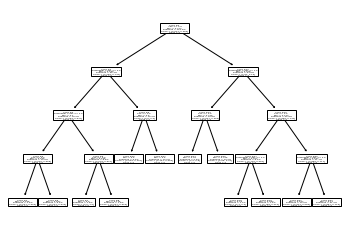

In [6]:
tree.plot_tree(DT, feature_names=['Passenger Class', 'Sex', 'Age'], class_names='Survived', label='all', proportion=True, node_ids=True)

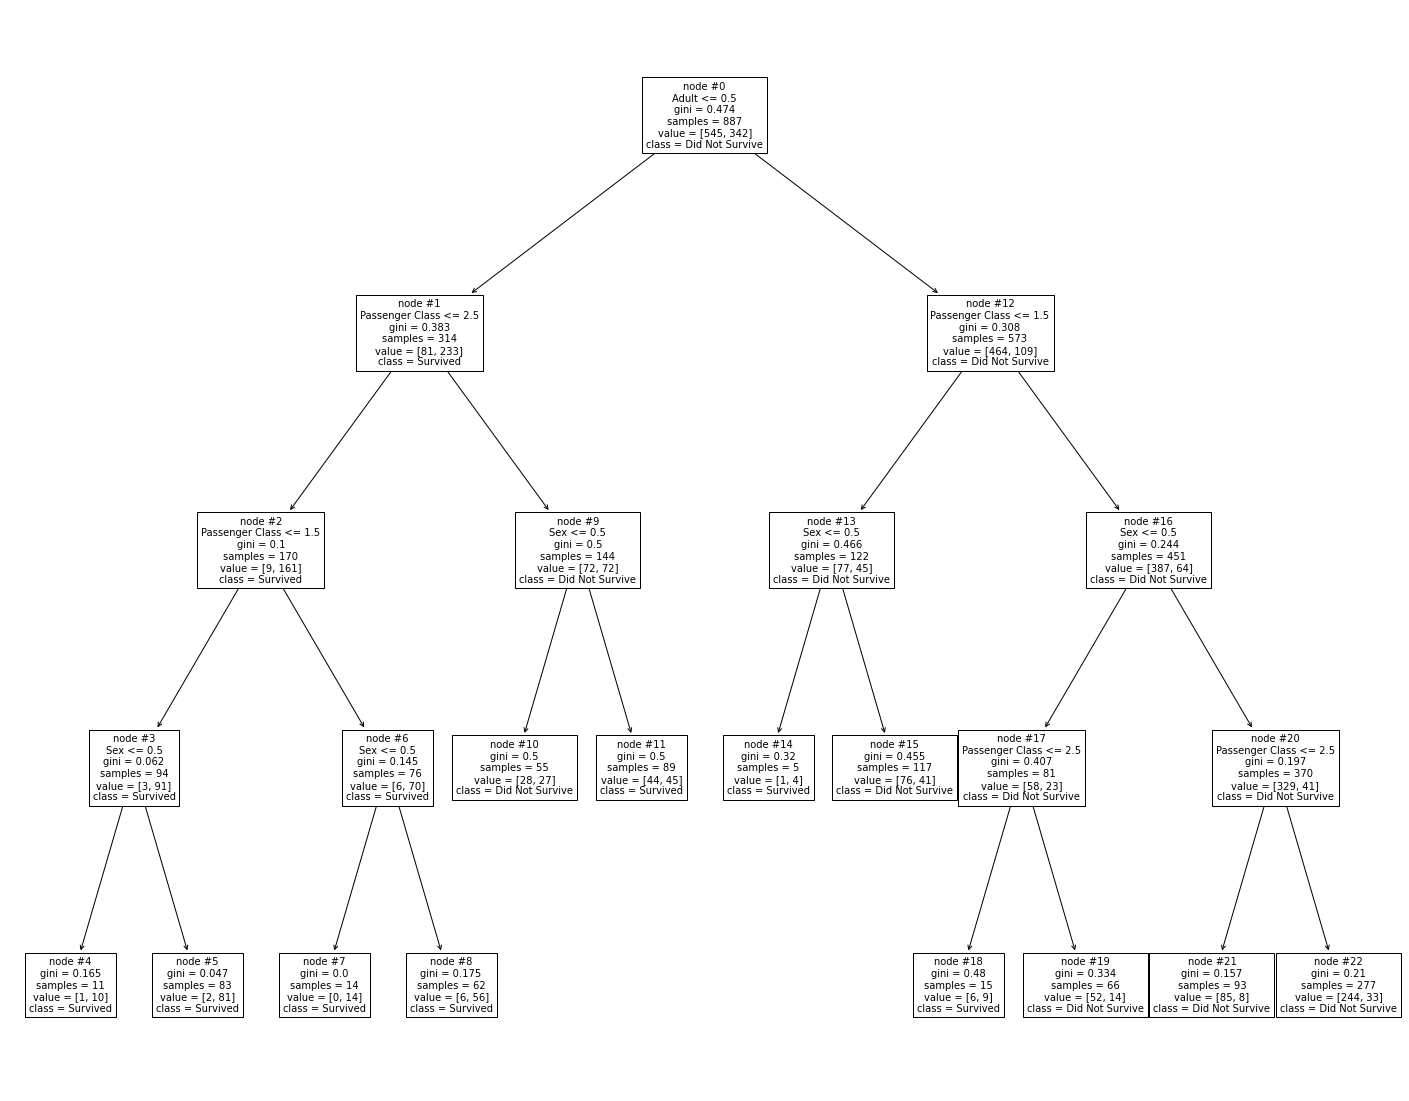

In [9]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT, feature_names=['Passenger Class', 'Sex', 'Adult'], class_names=['Did Not Survive', 'Survived'], label='all', node_ids=True)

fig.savefig("decision_tree_numbers.png")

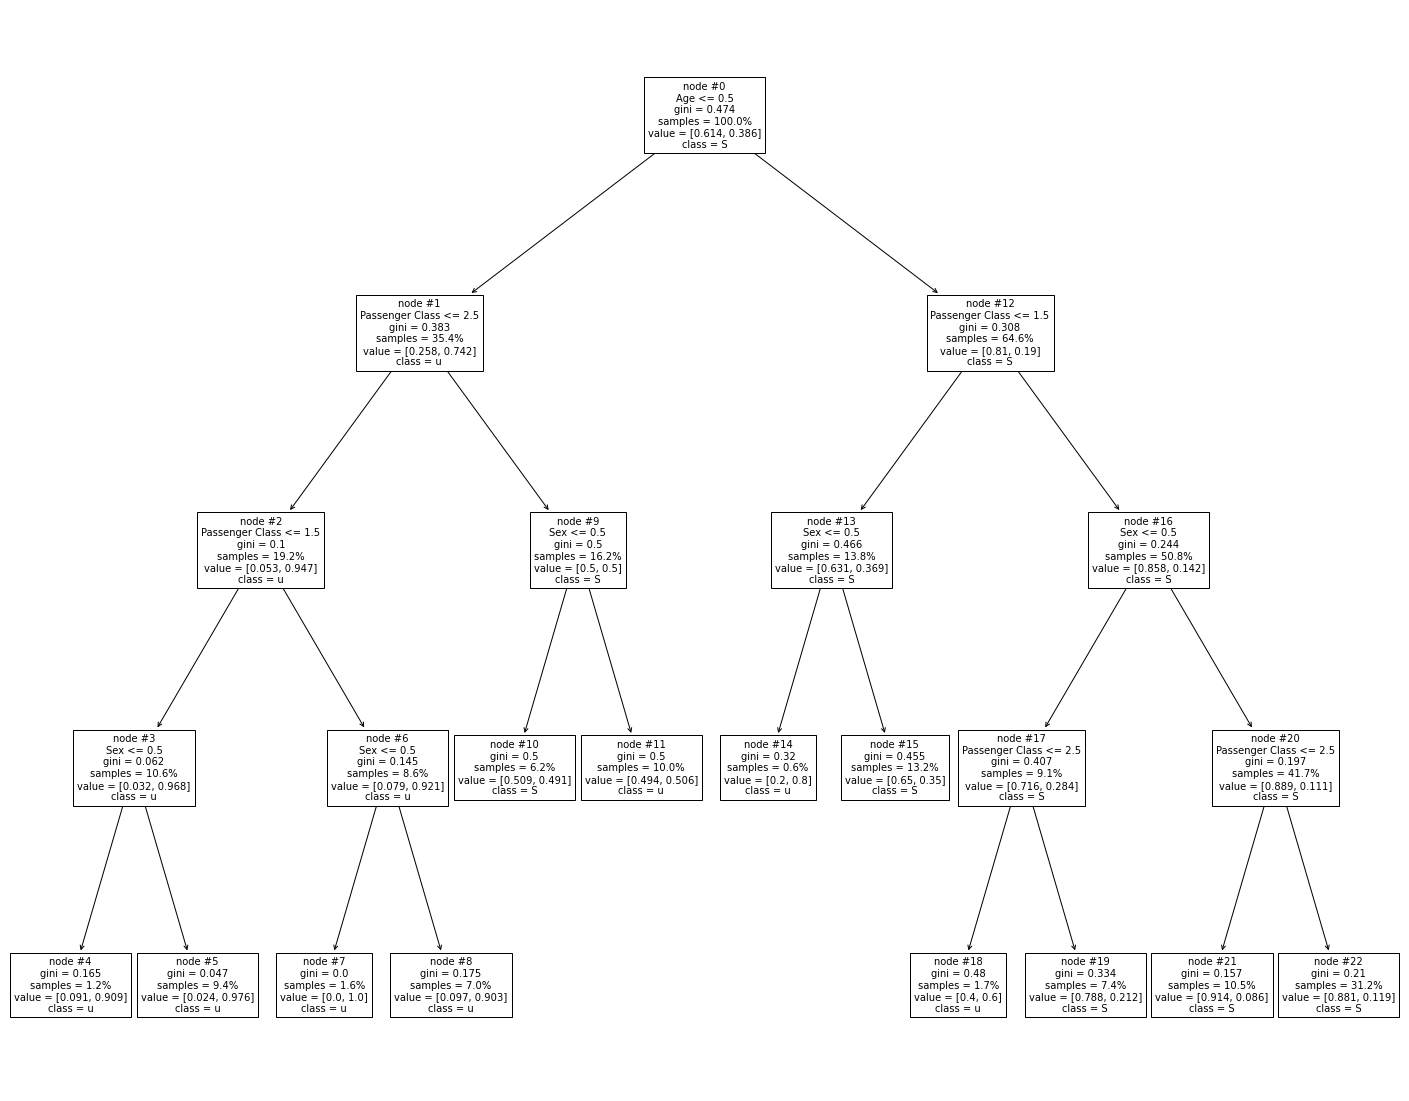

In [10]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT, feature_names=['Passenger Class', 'Sex', 'Age'], class_names='Survived', label='all', proportion=True, node_ids=True)

fig.savefig("decision_tree_percentages.png")

In [11]:
r = tree.export_text(DT, feature_names=['Passenger Class', 'Sex', 'Age'], spacing=4)
print(r)

|---- Age <= 0.50
|    |---- Passenger Class <= 2.50
|    |    |---- Passenger Class <= 1.50
|    |    |    |---- Sex <= 0.50
|    |    |    |    |---- class: 1
|    |    |    |---- Sex >  0.50
|    |    |    |    |---- class: 1
|    |    |---- Passenger Class >  1.50
|    |    |    |---- Sex <= 0.50
|    |    |    |    |---- class: 1
|    |    |    |---- Sex >  0.50
|    |    |    |    |---- class: 1
|    |---- Passenger Class >  2.50
|    |    |---- Sex <= 0.50
|    |    |    |---- class: 0
|    |    |---- Sex >  0.50
|    |    |    |---- class: 1
|---- Age >  0.50
|    |---- Passenger Class <= 1.50
|    |    |---- Sex <= 0.50
|    |    |    |---- class: 1
|    |    |---- Sex >  0.50
|    |    |    |---- class: 0
|    |---- Passenger Class >  1.50
|    |    |---- Sex <= 0.50
|    |    |    |---- Passenger Class <= 2.50
|    |    |    |    |---- class: 1
|    |    |    |---- Passenger Class >  2.50
|    |    |    |    |---- class: 0
|    |    |---- Sex >  0.50
|    |    |    |---- Pas

In [12]:
# Other attributes
print("The Classes in this Tree:", DT.classes_)
print("The feature importance in this Tree:", DT.feature_importances_[0])
print("The maximum number of features:", DT.max_features_)
print("The number of outputs:", DT.n_outputs_)

The Classes in this Tree: [0 1]
The feature importance in this Tree: 0.2577851124287161
The maximum number of features: 3
The number of outputs: 1


In [13]:
# Some Other Methods
new_X=X.sample(1)

print(DT.apply(X.iloc[np.r_[0:400], :]))

print("The index of the predicted leaf for each of the values is: \n", DT.apply(X.iloc[np.r_[0:400], :]),'\n')

print("The decision path for a random sample: \n", DT.decision_path(new_X),'\n')

print("Tree Depth: ",DT.get_depth(),'\n')
print("The number of leaves in the tree:",DT.get_n_leaves(),'\n')
print("The parameters used in this instance of this method:\n", DT.get_params(),'\n')
print("The cost complexity pruning path method:\n", DT.cost_complexity_pruning_path(X, y),'\n')
print("The R score of this Decision tree is:", DT.score(X, y),'\n')

print("A prediction value for a female adult passenger in class-1: ", DT.predict(np.array([[1,0,1]]))[0],'\n')

[22  5 11  5 22 22 15 19 11  7 10  5 22 22 10  8 19 21 11 11 21 21 10 15
 10 11 22 15 11 22 15  5 10 21 15 15 19 22 10 10 11  8  7 11 22 22 11 19
 10 19 22  5  8 15 15  8 22  7 19 22  5 15 19 15 19  8 22 10 22 21 10 21
 22 22 22 22 22 18 11 22 22 11 15  7 11 19 22  5 22 22 22 15 22 22 22 15
 15  8 21 11 22 15 22 22 22 11 22 22 11 15 10 22 11 10 22 22 21 15 10 21
 22 21  8 15 19 22 22 10 22 22 22 11  8 21 21  5 15 19 15 11 11 11 22 18
 21 22 10 21 21 21  5 22 22 22 15 10 22 22 19 22  8 22 19 19 19  5 11 15
 22 15 19 10 22 15 19 19  5 21 22 10 21 19 18 10 15 11 15 22 22  8 21 11
 18  5  5 22 22 11  8 22 19 22 22 19 10 22 22 10 15 22  8 22 21 22  5 11
 21  5 21 19 21 22 22 15 22 21 22 18 10  5 22 21 10 21 11 21  7 21 21 11
 10 21 22 22 15 11  8 15 21 19 11 15 22 11 11  5  5  5  8 19 15 15 11 21
 19 22  5  5 15 22  8 15 11  5 11 21 19 11 22 22 19 22 15 22 22 22 21 11
  5  5 21 11 22 15 22  4 15  5 11 22 22  8 22 14  5  4 21  5  5  4  8 22
 21 11  8 21  5  5 22 22  8  8 22  5 22  8 11  4 11